### Webscrapping Python 

In [1]:
import random
from time import sleep
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
#cambien su ruta
DRIVER_PATH = 'documentos/chromedriver 3'
opt = webdriver.ChromeOptions()
opt.add_argument('--start-maximized')
opt.add_argument('--disable-extensions')
##chequen que sea la version más actualizada yo estoy usando la version 100 de chrome que es la más nueva
s = Service(r'documentos/chromedriver 3')
driver = webdriver.Chrome(service=s,options=opt)


In [74]:
driver.get('https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true')
sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")


In [92]:
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text


### Impresion Auto más caro

In [75]:
driver.get("https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true&sorting=desc-price")
sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")
#mail = driver.find_element(By.XPATH, mail_input2)
#driver.implicitly_wait(3)
Diccionario = {}
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text 
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text
    Diccionario.update({nombre : precio }) 

In [78]:
print(list(Diccionario.keys())[0])

2020, Honda Odyssey


#### Agregar por marcas

In [79]:
driver.get("https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true&sorting=asc-price")
#cambiar asc por desc y cambia en ascendente o descendente precio

sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")
#mail = driver.find_element(By.XPATH, mail_input2)
#driver.implicitly_wait(3)
Diccionario = {}
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text 
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text
    Diccionario.update({nombre : precio })

In [80]:
Diccionario


{'2017, Chevrolet Spark': '$ 169,000\nMensualidad $ 3,288',
 '2016, Chevrolet Spark': '$ 150,000\nMensualidad $ 2,918',
 '2016, Chevrolet Aveo': '$ 156,905\nMensualidad $ 3,052',
 '2016, Ford Figo': '$ 168,900\nMensualidad $ 3,286',
 '2017, Chevrolet Aveo': '$ 169,000\nMensualidad $ 3,288',
 '2019, Dodge Attitude': '$ 171,231\nMensualidad $ 3,331',
 '2019, Chevrolet Beat': '$ 173,120\nMensualidad $ 3,368',
 '2017, Volkswagen Gol': '$ 199,000\nMensualidad $ 3,871',
 '2016, Nissan March': '$ 175,800\nMensualidad $ 3,420',
 '2018, Ford Figo': '$ 178,000\nMensualidad $ 3,463',
 '2018, Nissan Versa': '$ 180,000\nMensualidad $ 3,502',
 '2018, Chevrolet Aveo': '$ 180,000\nMensualidad $ 3,502',
 '2020, Renault Kwid': '$ 187,000\nMensualidad $ 3,638',
 '2018, Chevrolet Beat': '$ 187,500\nMensualidad $ 3,648',
 '2020, Chevrolet Beat': '$ 199,350\nMensualidad $ 3,878',
 '2017, Toyota Yaris': '$ 190,000\nMensualidad $ 3,696',
 '2015, Volkswagen Vento': '$ 190,400\nMensualidad $ 3,704',
 '2017, Che

In [81]:
print(list(Diccionario.keys())[0])

2017, Chevrolet Spark


In [68]:

driver.get("https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true&sorting=desc-price")
sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")
#mail = driver.find_element(By.XPATH, mail_input2)
#driver.implicitly_wait(3)


In [85]:

ListaApariciones = []
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text 
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text

  
    ListaApariciones.append(nombre.split(" ")[1])
    #seleccionamos la marca del vehiculo
    Diccionario.update({nombre.split(" ")[1] : precio })

In [87]:
SumadeMarcas = dict(zip(ListaApariciones,map(lambda x: ListaApariciones.count(x),ListaApariciones)))

In [88]:
print(SumadeMarcas)

{'Chevrolet': 21, 'Ford': 3, 'Dodge': 1, 'Volkswagen': 6, 'Nissan': 5, 'Renault': 2, 'Toyota': 1, 'Fiat': 1}


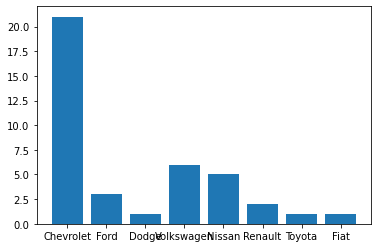

In [89]:
import matplotlib.pyplot as plt

plt.bar(range(len(SumadeMarcas)), list(SumadeMarcas.values()), align='center')
plt.xticks(range(len(SumadeMarcas)), list(SumadeMarcas.keys()))
plt.show()

Agregar a archivo txt

In [91]:
import json
# as requested in comment
Nombre = {'CarrosBaratos': SumadeMarcas}
with  open("./documentos/carros.txt", "w") as file:
    file.write(json.dumps(Nombre)) # use `json.loads` to do the reverse

In [54]:
Diccionario

{'Chevrolet': '$ 200,000\nMensualidad $ 3,891',
 'Ford': '$ 199,000\nMensualidad $ 3,871',
 'Dodge': '$ 171,231\nMensualidad $ 3,331',
 'Nissan': '$ 199,000\nMensualidad $ 3,871',
 'Volkswagen': '$ 199,000\nMensualidad $ 3,871',
 'Renault': '$ 199,000\nMensualidad $ 3,871',
 'Toyota': '$ 190,000\nMensualidad $ 3,696',
 'Fiat': '$ 192,300\nMensualidad $ 3,741'}